# A MultiClass Neural Network #

Let's try coding a Multiclass neural network from scratch

In [1]:
# import useful librairies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's make a multilabel dataset

# Initialize randomness
np.random.seed(42)

# Our dataset is made of coded numbers
zero = np.array([[1],[1],[1],[0],[1],[1],[1]])
one = np.array([[0],[0],[0],[0],[0],[1],[1]])
two = np.array([[0],[1],[1],[1],[1],[1],[0]])
three = np.array([[0],[0],[1],[1],[1],[1],[1]])
four = np.array([[1],[0],[0],[1],[0],[1],[1]])
five = np.array([[1],[0],[1],[1],[1],[0],[1]])
six = np.array([[1],[1],[1],[1],[1],[0],[1]])
seven = np.array([[0],[0],[1],[0],[0],[1],[1]])
eight = np.array([[1],[1],[1],[1],[1],[1],[1]])
nine = np.array([[1],[0],[1],[1],[1],[1],[1]])

# A function to decode our number
def decode_num(x):
    r = x
    r = np.insert(r, 0, [0])
    r = np.insert(r, -2, [0])
    r = r.reshape(9,1)
    r = np.append(r[:3], np.append(r[3:6], r[6:], axis = 1), axis = 1)
    stringa = ''
    stringb = ''
    stringc = ''
    for i,y in enumerate(r):
        for j,v in enumerate(y):
            if i == 0:
                if v == 1 and j == 1:
                    stringa = stringa + '_'
                else:
                    stringa = stringa + ' '
            if i == 1:
                if v == 1 and j == 1:
                    stringb = stringb + '_'
                elif v == 1:
                    stringb = stringb + '|'
                else:
                    stringb = stringb + ' '
            if i == 2:
                if v == 1 and j == 1:
                    stringc = stringc + '_'
                elif v == 1:
                    stringc = stringc + '|'
                else:
                    stringc = stringc + ' '
    print(stringa)
    print(stringb)
    print(stringc)

In [66]:
# Making m examples from our coded numbers
m = 2000
# Choosing randomly the numbers for m examples
pre_dataset = np.random.randint(0, 10, (1, m))

# Setting labels
Y = np.zeros(0)
for v in pre_dataset[0]:
    Y = np.append(Y, [0 for x in range(v)] +[1] + [0 for x in range(9-v)])
Y = Y.reshape(m,10)

# Setting inputs
numbers = [zero, one, two, three, four, five, six, seven, eight, nine]
X = np.zeros(0)
for v in pre_dataset[0]:
    X = np.append(X, [numbers[v]])
X = X.reshape(m,7)

# Let's check if everything works find
# for i, v in enumerate(Y):
#     decode_num(X[i])
#     print('label : ' , np.where(v == 1)[0])

In [4]:
# Activation function
def activation(x, function = 'sigmoid'):
    if function == 'sigmoid':
        return 1/(1+np.exp(-x))
    else:
        raise NotImplementedError

X shape :  (2000, 7)
Y shape :  (2000, 10)
Archi :  [7, 3, 10]
LOOP :  0
Loss :  10.16387840426331
Accuracy :  0.0
LOOP :  100
Loss :  10.136565075003928
Accuracy :  10.15
LOOP :  200
Loss :  10.119080444477783
Accuracy :  20.75
LOOP :  300
Loss :  10.111301496413656
Accuracy :  20.75
LOOP :  400
Loss :  10.114046092250996
Accuracy :  20.75
LOOP :  500
Loss :  10.12526259891321
Accuracy :  10.6
LOOP :  600
Loss :  10.14012844317474
Accuracy :  10.6
LOOP :  700
Loss :  10.160469838120306
Accuracy :  10.6
LOOP :  800
Loss :  10.183789471972231
Accuracy :  10.6
LOOP :  900
Loss :  10.208786540194652
Accuracy :  10.6


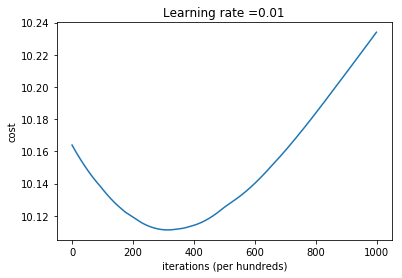

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
89.4


In [96]:
# The neural network

# Initialisation
# the architecture (hidden layers)
N = [3]
m = X.shape[0]

# Adding the input and output layers
N = [X.shape[1]] + N + [Y.shape[1]]

# Check X, Y and N
print('X shape : ', X.shape)
print('Y shape : ', Y.shape)
print('Archi : ', N)

# Weights and bias
np.random.seed(2)
W = [np.random.randn(N[r], N[r+1]) for r in range(len(N)-1) ]
b = [np.zeros((1, N[r+1])) for r in range(len(N)-1)]

# Hyperparameters
lr = 0.01
epoch = 1000
costs = []

# The training
for i in range(epoch):
    A = [X]
    # Forward
    for l in range(len(N)-1):
#         print('LAYER : ', l+1)
        # the last layer
        if l == len(N) - 2:
            # compute the softmax
            Z = np.dot(A[l], W[l]) + b[l]
            # Normalize Z to avoid Softmax big numbers
            Z = Z - np.amax(Z, axis=1, keepdims=True)
            Ypred = np.exp(Z) / np.sum(np.exp(Z))
        else:
#             print(A[l].shape)
#             print(W[l].shape)
            Z = np.dot(A[l], W[l]) + b[l]
            A.append(activation(Z))
#         print(A[l].shape)
    
#     print('Ypred : ', Ypred.shape)
#     print(Ypred)
    # Cost
    L = -Y * np.log(Ypred)
#     print(L)
    C = np.sum(L) / m
    costs.append(C)
    pred = (Ypred == np.max(Ypred, axis=1, keepdims=True)) * 1.
#     print(pred[:10])
#     print(Y[:10])
    accuracy_inter  = (np.sum((pred+Y==2)*1)/pred.shape[0])*100
    if i % 100 == 0:
        print('LOOP : ', i)
        print('Loss : ', C)
        print('Accuracy : ', accuracy_inter)
    
    # Backward
    dw = []
    db = []
    dz = Ypred - Y # (m 10)
    dw.insert(0, np.dot(A[-1].T, dz) / m) # (m p)
    db.insert(0, np.sum(dz, axis = 0, keepdims=True) / m) # (1 p)
    for l in reversed(range(len(N) - 2)):
        dz = np.dot(dz, W[l+1].T) * (A[l+1] * (1 - A[l+1]))
        dw.insert(0, np.dot(A[l].T, dz) / m)
        db.insert(0, np.sum(dz, axis = 0, keepdims=True) / m)
    
#     for v in dw:
#         print('dw : ', v.shape)
    
    # Update
    for l in range(len(N)-1):
#         print('update : ',W[l].shape)
#         print(dw[l].shape)
        W[l] = W[l] - lr * dw[l]
        b[l] = b[l] - lr * db[l]
        
# Let's show the loss evolution
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(lr))
plt.show()

pred = (Ypred == np.max(Ypred, axis=1, keepdims=True)) * 1
print(pred)
accuracy  = (1 - np.sum((prediction+Y==2)*1)/prediction.shape[0])*100
print(accuracy)
    
        
    

In [93]:
##### cellule de test
prediction = (Ypred == np.amax(Ypred, axis = 1, keepdims=True)) * 1.
print(np.sum((prediction + Y == 2) * 1.)/2000)
accuracy = (np.sum((prediction+Y==2)*1)/prediction.shape[0])*100
print(accuracy)
(1 - (np.sum((prediction + Y == 2) * 1.) / prediction.shape[0])) * 100

toto=np.sum((prediction + Y == 2)*1)
print('toto',toto)
# print('toto : ',np.sum(toto))

wrong=0
for i in range(prediction.shape[0]):
    if (prediction[i] == Y[i]).all():
        wrong += 1
        
print((prediction[4] + Y[4] == 1).any())        
wrong2=0
for i in range(2000):
    r = prediction[i] + Y[i] == 1
    if r.any() == True:
        wrong2 += 1
print('wrong2 :',wrong2)
        
print(wrong/2000)
(1 - wrong/2000)*100

0.106
10.6
toto 212
False
wrong2 : 1788
0.106


89.4